In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,LeavePOut # 数据集划分方法
from sklearn.model_selection import cross_val_score,cross_validate # 计算交叉验证下的测试误差
from sklearn import preprocessing
import sklearn.linear_model as LM
from sklearn import neighbors

一元回归模型的截距项:0.955268
一元回归模型的回归系数: [60.58696023]


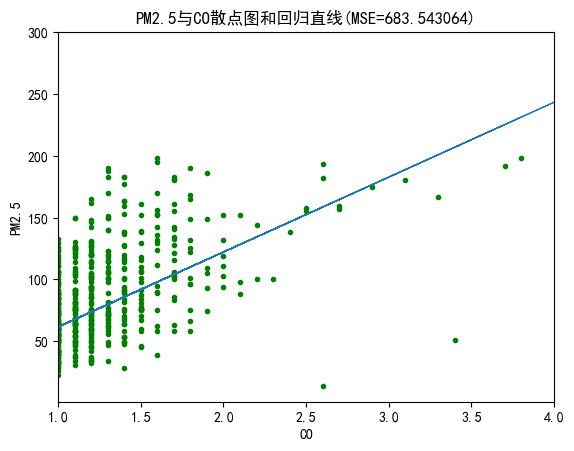

In [2]:
data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.nan)
data=data.dropna()
data=data.loc[(data['PM2.5']<=200) & (data['SO2']<=20)]

###一元回归
X=data[['CO']]
y=data['PM2.5']
modelLR=LM.LinearRegression()
modelLR.fit(X,y)
print("一元回归模型的截距项:%f"%modelLR.intercept_)
print("一元回归模型的回归系数:",modelLR.coef_)
plt.scatter(data['CO'],data['PM2.5'],c='green',marker='.')
plt.title('PM2.5与CO散点图和回归直线(MSE=%f)'%(sum((y-modelLR.predict(X))**2)/len(y)))
plt.xlabel('CO')
plt.ylabel('PM2.5')
plt.xlim(xmax=4, xmin=1)
plt.ylim(ymax=300,ymin=1)
plt.plot(data['CO'],modelLR.predict(X),linewidth=0.8)
plt.show()


In [3]:
##多元回归
X=data[['SO2','CO']]
y=data['PM2.5']
modelLR=LM.LinearRegression()
modelLR.fit(X,y)
print("多元回归模型的截距项:%f"%modelLR.intercept_)
print("多元回归模型的回归系数:",modelLR.coef_)
print("多元回归模型的MSE:%f"%(sum((y-modelLR.predict(X))**2)/len(y)))

多元回归模型的截距项:-1.249076
多元回归模型的回归系数: [ 0.85972339 56.85521851]
多元回归模型的MSE:672.048805


说明：
1、这里以空气质量监测的部分数据为例，对PM2.5（输出变量）进行预测。首先考虑只有一个输入变量CO的情况，建立一元线性回归模型。然后，研究SO2和CO对PM2.5的影响，建立多元线性回归模型。
2、建立线性回归模型需引用sklearn中的linear_model。首先，modelLR=LM.LinearRegression()定义modelLR对象为线性模型；然后，modelLR.fit(X,y)表示基于给出的X和y估计模型参数。其中，X为输入变量（矩阵形式），y为输出变量。最后，modelLR.predict(X)表示将X带入回归方程计算y的预测值。
3、线性回归模型参数的估计值存储在intercept_和.coef_属性中，依次为截距项和回归系数。
4、在研究CO对PM2.5的影响时，CO的回归系数估计值（60.59）大于0，表示其他因素不变条件下，CO浓度增加一个单位将导致PM2.5均值增加60.59。
5、在研究SO2和CO对PM2.5的影响时，CO的回归系数估计值（56.86）大于SO2（0.86），表明CO对PM2.5的正向贡献大于SO2。